# Question 2

Salary_hike -> Build a prediction model for Salary_hike.

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
# Import Dataset
sd= pd.read_csv('C:/Users/chowd/OneDrive/Desktop/Data Science/Assignments/Salary_Data.csv')
sd.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
sd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
sd.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
# Correlation matrix
sd.corr()


,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

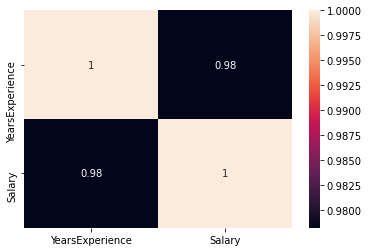

In [6]:
sns.heatmap(sd.corr(),annot=True)

C:\Users\VARALAKSHMI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


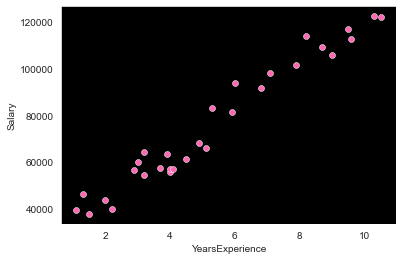

In [7]:
sns.set_style('dark',{'axes.facecolor':'black'})
sns.scatterplot(sd.YearsExperience,sd.Salary,color='hotpink')
plt.show()


## Splitting the data to test and train data

In [8]:
x=sd.iloc[:,0].values.reshape(-1,1)
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [9]:
y=sd.iloc[:,1].values
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [10]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

In [11]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


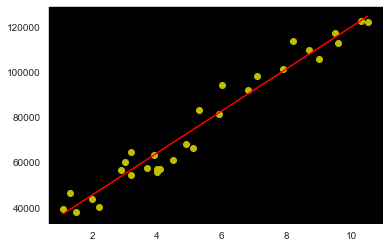

In [12]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y,color='y')
plt.plot(x, line,'r');
plt.show()

In [13]:
#print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test)
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [14]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 


,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


In [15]:
YearsExperience = 5.5
own_pred = regressor.predict([[YearsExperience]])
print("If the years of experience is = {}".format(YearsExperience))
print("Predicted Salary = {}".format(own_pred[0]))

If the years of experience is = 5.5
Predicted Salary = 77999.26234763872


In [16]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:',
        metrics.mean_squared_error(y_test, y_pred))
print('R_Squared score(test):',
        metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 2446.1723690465064
Mean Squared Error: 12823412.298126562
R_Squared score(test): 0.988169515729126


## OLS technique


In [17]:
import statsmodels.formula.api as smf
model=smf.ols('Salary~YearsExperience',data=sd).fit()

In [18]:
model.rsquared


0.9569566641435086

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           1.14e-20
Time:                        13:15:07   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Applying logarithmic Transformation

In [20]:
sd_log=sd.rename(columns={"YearsExperience":"Exp"})
sd_log.head()

,Exp,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [21]:
modelnew=smf.ols('np.log(Salary)~np.log(Exp)',data=sd_log).fit()
modelnew.rsquared

0.9052150725817149

In [22]:
modelnew.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           7.40e-16
Time:                        13:16:10   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      10.3280      0.056    184.868      0.000      10.214      10.442
np.log(Exp)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

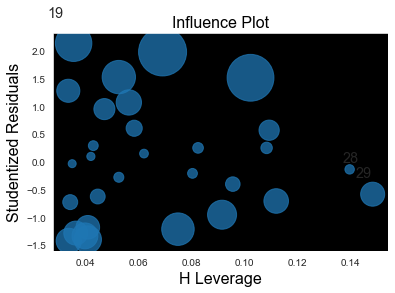

In [23]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

## Outlier detection using Cooks Distance

In [24]:
from statsmodels.graphics.regressionplots import influence_plot
model_influence = modelnew.get_influence()
(c, _) = model_influence.cooks_distance

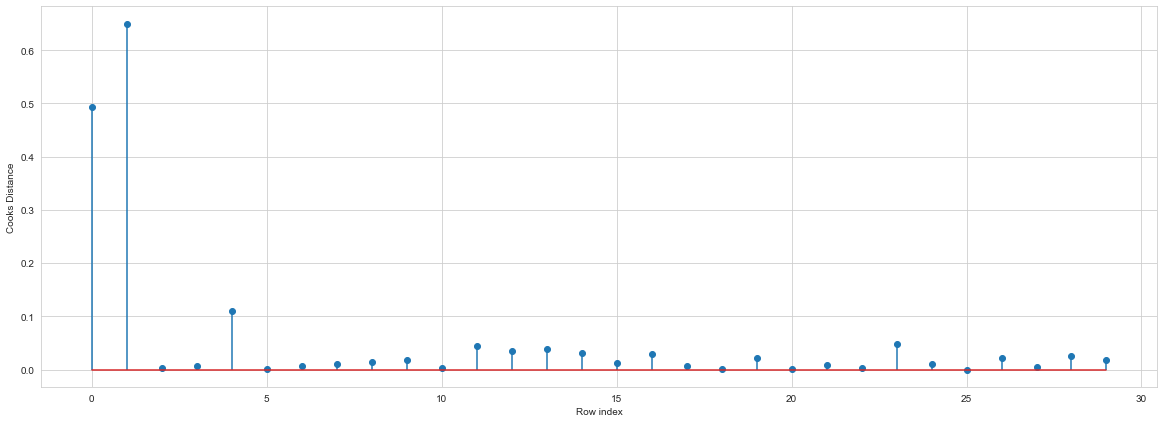

In [25]:
#Plot the influencers values using stem plot
sns.set_style('whitegrid')
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(sd)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [26]:
(np.argmax(c),np.max(c))


(1, 0.6504395192775373)

In [27]:
sdnew=sd.drop(sd.index[1],axis=0).reset_index()
model2=smf.ols('Salary~YearsExperience',data=sdnew).fit()
model2.rsquared

0.958587833405514

### Outcome:
From the given dataset, using cooks distance and applying transformation, 95% (rsquared) accuracy is obtained

 